# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

In [2]:
# Checking basic info about dataframe
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


#### EDA Question 1A:  How many reps are in the North branch?  

In [3]:
north_df['Rep ID'].nunique()

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [4]:
south_df['Rep ID'].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [5]:
#Code Used:
north_df_avg = north_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time" ]].mean().round(2)
print(north_df_avg)

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [6]:
#Code Used:
south_df_avg = south_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time" ]].mean().round(2)
print(south_df_avg)

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [7]:
# Number of Calls for the North_df
north_df_Rep_callsum = north_df.groupby(by="Time Block")["Calls"].sum()
north_df_Rep_callsum                                                   

Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Calls, dtype: int64

In [8]:
# Number of Calls for the South_df
south_df_Rep_callsum = (south_df.groupby(['Time Block']).Calls.sum())
south_df_Rep_callsum

Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Calls, dtype: int64

In [9]:
# Total Number of Calls for both North and South DataFrame
north_df_Rep_callsum + south_df_Rep_callsum

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 165
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> There is missing data in the 'Incoming Wait Time column'. 163(67%) values are missing in the north_df and 188 values(60%) are missing in the south_df.
I will use the 'mean' of the incoming wait time to impute the missing data.

In [10]:
# Using code to check the count of missing values at the North Call Center.
north_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [11]:
# Using code to check the total count of missing values in South_df.
south_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [12]:
# Checking percentage of missing data in north_df
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [13]:
#Checking percentage of missing data in south_df
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


#### Imputing data for null values in Incoming Wait Time.
Using a box plot below to check the distribution of the values of Incoming wait Time. As the box plot shows a central distribution and there are no outliers, I will use the mean to impute the null values in the Incoming Wait Time column.

In case there was skewing or outliers, I would have used a median or mode to impute the missing values.

<Axes: xlabel='Incoming Wait Time'>

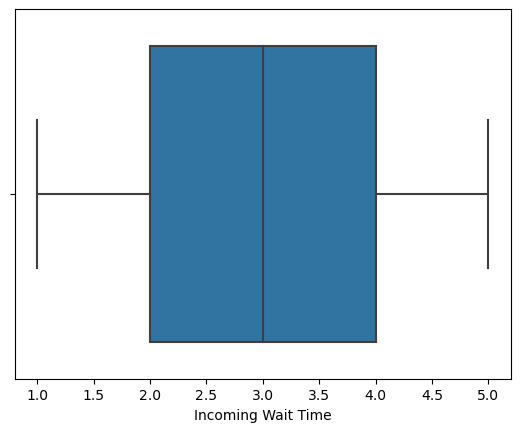

In [14]:
# Checking the boxplot for distribution of the incoming wait time for north_df
sns.boxplot(x=north_df["Incoming Wait Time"])

In [15]:
print(north_df['Incoming Wait Time'].mean().round(2))

3.05


In [16]:
# Imputing mean for the missing values
north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].fillna(north_df['Incoming Wait Time'].mean().round(2))

<Axes: xlabel='Incoming Wait Time'>

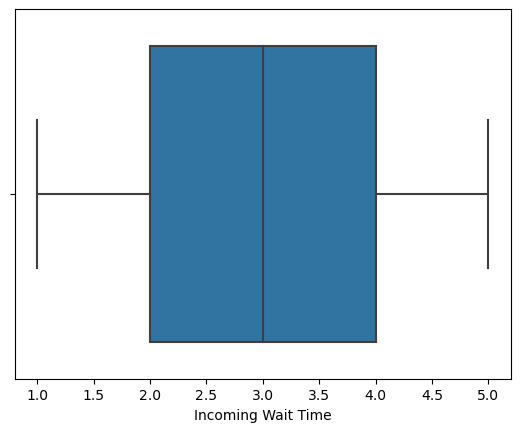

In [17]:
# Checking the boxplot for distribution of the incoming wait time for southth_df
sns.boxplot(x=south_df["Incoming Wait Time"])

In [18]:
print(south_df['Incoming Wait Time'].mean().round(2))

3.0


In [19]:
# Imputing mean for the incoming wait time 
south_df['Incoming Wait Time'] = south_df['Incoming Wait Time'].fillna(south_df['Incoming Wait Time'].mean().round(2))

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
I removed the extra space in the 'Sale' column using the strip function, and checked back on the value_counts.

In [20]:
#Checking the different value counts in the 'Sale Column'
north_df['Sale'].value_counts()



NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [21]:
# Stripping any spaces in the 'Sale' column
north_df['Sale'] = north_df['Sale'].str.strip()

In [22]:
# Rechecking to see if all 'YES' values are in the same column
north_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicates in the two data sets.

In [23]:
print(north_df.duplicated().sum())

0


In [24]:
print(south_df.duplicated().sum())

0


In [25]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     245 non-null    float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> I would like to drop the 'During Call Wait Time' 

In [26]:
north_df = north_df.drop(['During Call Wait Time'], axis=1)

In [27]:
south_df = south_df.drop(['During Call Wait Time'], axis=1)

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [28]:
# Create dataframe for the entire company named df
#Joining the north and south data frame with concat
df = pd.concat([north_df, south_df], keys=["North", "South"])
df

Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing  \
North 0             0  North        Complaint    9:00 AM             Incoming   
      1             1  North    Sales Support   11:00 AM             Incoming   
      2             2  North    Sales Support   11:00 AM             Incoming   
      3             3  North    Sales Support    4:00 PM             Incoming   
      4             4  North  Product Support   12:00 PM             Incoming   
...               ...    ...              ...        ...                  ...   
South 309         309  South  Product Support    5:00 PM             Outgoing   
      310         310  South  Product Support    5:00 PM             Outgoing   
      311         311  South  Product Support    5:00 PM             Outgoing   
      312         312  South  Product Support    5:00 PM             Outgoing   
      313         313  South  Product Support    5:00 PM             Outgoing   

          Queue  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  \
North 0       B   Brent   NO          0          1             9   
      1       A     Cam   NO          0          0            11   
      2       B    Todd   NO          0          0             9   
      3       B   Brent   NO          0          0            11   
      4       B   Brent   NO          0          0             8   
...         ...     ...  ...        ...        ...           ...   
South 309     D   Helga   NO          0          0            10   
      310     C   Susan   NO          0          0            12   
      311     C   Sandy   NO          0          0             9   
      312     C    Eric   NO          0          0            10   
      313     D  George   NO          0          0            10   

           Not Ready Minutes  Incoming Wait Time  Calls  
North 0                    2                 1.0      1  
      1                    1                 1.0      1  
      2                    3                 1.0      1  
      3                    2                 1.0      1  
      4                    2                 1.0      1  
...                      ...                 ...    ...  
South 309                  3                 3.0      1  
      310                  3                 3.0      1  
      311                  3                 3.0      1  
      312                  1                 3.0      1  
      313                  2                 3.0      1  

[559 rows x 14 columns]

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37
- South Branch = Eric, 35


In [29]:
# Creating a pivot table to get the value of total calls of each Rep ID and grouping them by branch.
# I have sorted the values of the Rep by their total count.
Rep_call_table = df.pivot_table(values = "Calls", index = ["Rep ID"], columns =["Branch"], aggfunc=np.sum, margins = True, margins_name = "Call_count")
Rep_call_table.sort_values( "Call_count")

Branch,North,South,Call_count
Rep ID,,,
Alice,NaN,20.0,20
Amanda,23.0,NaN,23
Andy,23.0,NaN,23
Cam,24.0,NaN,24
Xander,24.0,NaN,24
Sharon,NaN,25.0,25
Susan,NaN,26.0,26
Joe,26.0,NaN,26
Josh,NaN,26.0,26


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%? The average call abandonment rate,  Company Wide and the South Branch fall below 2% 

In [30]:
# Calculating the average abandonment rate grouped by branch
aba_rate = ((df.groupby('Branch')['Abandoned'].mean()) * 100).round(2)
aba_rate

Branch
North    2.86
South    1.27
Name: Abandoned, dtype: float64

In [31]:
# Calculating the average abandonment rate for the whole company
(df['Abandoned'].mean() * 100).round(2)

1.97

In [32]:
# Second method to calculate abandonment rate grouped by branch
x = df.groupby(['Branch']).agg({'Abandoned': 'sum', 'Calls': 'sum' }).astype(int)

In [33]:
x['Result'] = ((x.Abandoned/x.Calls) * 100).round(2)
x['Result']

Branch
North    2.86
South    1.27
Name: Result, dtype: float64

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24 % (33 calls)
- South Branch = 38.10 % (48 calls)
- Company Wide = 38.94 % (81 calls)

In [34]:
# Calculating the total calls answered within 2 seconds : 'quick_call_sum'
# Calculate the total number of incoming calls for the whole company :'calls_total'

calls_quick = df[df["Incoming Wait Time"] <= 2.0]
quick_call_sum = calls_quick[["Calls"]].sum()
calls_incoming = df[df["Incoming or Outgoing"] == "Incoming"]
calls_total = calls_incoming[["Calls"]].sum()

In [35]:
# Total number of calls answered within 2 seconds
quick_call_sum

Calls    81
dtype: int64

In [36]:
# Calculating Service level for the whole company with the below formula
Service_level_percent  = ((quick_call_sum / calls_total) * 100).round(2)

In [37]:
Service_level_percent

Calls    38.94
dtype: float64

Next, Calculating the service level by Branch

In [38]:
# Calculating the sum of calls answered within 2 seconds and the total number of incoming calls, and then grouping by Branch.
#Creating a table for the results.


calls_quick = df[df["Incoming Wait Time"] <= 2.0]
quick_call_branch = calls_quick[["Branch", "Calls"]]
quick_call_branch_sum = quick_call_branch.groupby("Branch").sum()

calls_incoming = df[df["Incoming or Outgoing"] == "Incoming"]
calls_total_branch = calls_incoming[["Branch","Calls"]]
calls_total_branch_sum = calls_total_branch.groupby("Branch").sum()



In [39]:
# Merging the above two tables 

service_level_br = pd.merge(quick_call_branch_sum, calls_total_branch_sum, on="Branch")
service_level_br

,Calls_x,Calls_y
Branch,,
North,33,82
South,48,126


In [40]:
# Calculating the Service level percent and merging to above table

service_level_br["Service Level Branch"] = service_level_br["Calls_x"]/service_level_br["Calls_y"] * 100
service_level_br.round(2)

,Calls_x,Calls_y,Service Level Branch
Branch,,,
North,33,82,40.24
South,48,126,38.10


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.02 
- South Branch in seconds = 3.01
- Company Wide in seconds = 3.01


In [41]:
# Code Used for Average speed of answer grouped by branch
avg_speed_branch = (df.groupby('Branch')['Incoming Wait Time'].mean()).round(2)
avg_speed_branch

Branch
North    3.05
South    3.00
Name: Incoming Wait Time, dtype: float64

In [42]:
# Average speed of answer for whole company
df['Incoming Wait Time'].mean().round(2)

3.02

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose the bar graph as we have categorical values('Queues'). 

C:\Users\snigd\AppData\Local\Temp\ipykernel_17728\1173806675.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


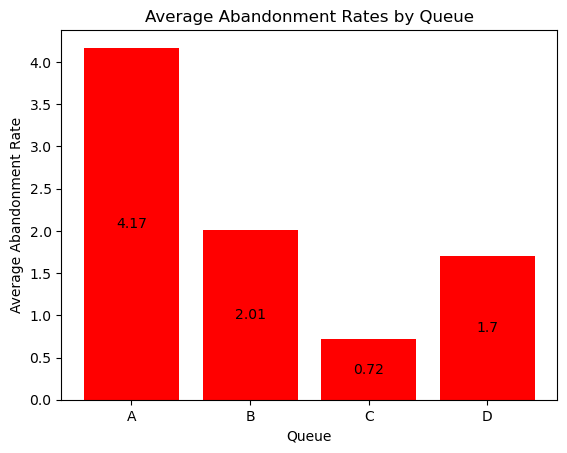

In [43]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]
    
#Your Code Here:
# Calculating the average abandonment rate for each Queue and storing it in a new dictionary    
avg_abandonment_rates = {}  
for i in range(4):    
    avg_abandonment_rates[queues[i]] = ((abandonment_rates[queues[i]]) * 100).round(2)

# Show the plot
#Using the values from the dictionary above to mark the x and y axes and create a bar graph.

names = list(abandonment_rates.keys())  # Using the keys from abandonment_rates dictionary as x values (Queue)
values = list(avg_abandonment_rates.values()) # Using the values from the avg_abandonment_rates as the y values(avg_abandonment_rate)
plt.style.use('seaborn-v0_8-muted')
fig, ax = plt.subplots()
g = ax.bar(range(len(abandonment_rates)), values, tick_label=names, color = 'red')
ax.set_title('Average Abandonment Rates by Queue')
ax.set_xlabel('Queue')
ax.set_ylabel('Average Abandonment Rate')
ax.bar_label(g, label_type="center") 
plt.show()


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I have chosen a bar graph to compare the values of different Rep ID's in the North Branch

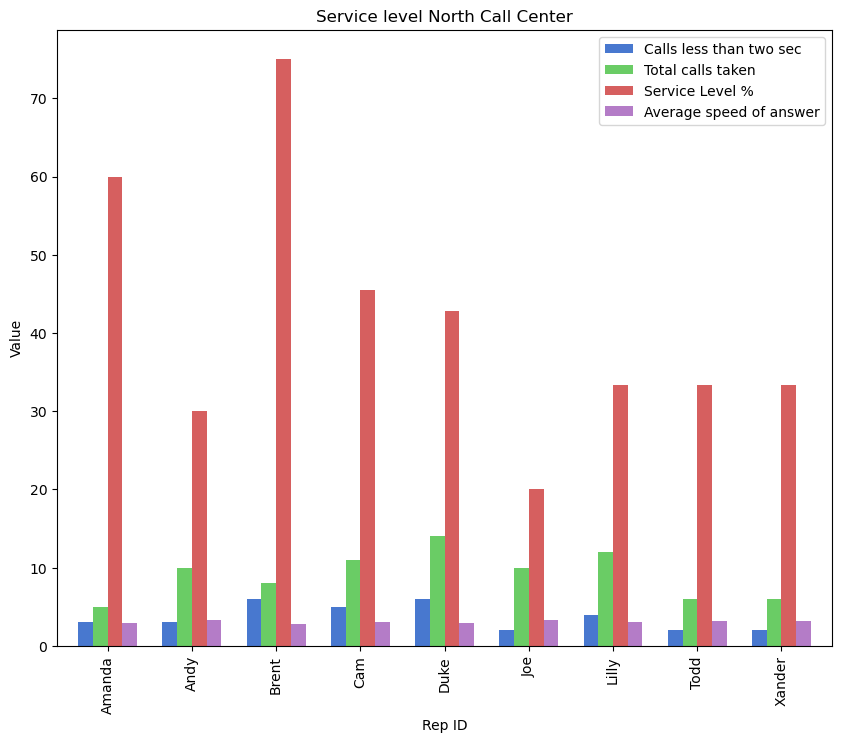

In [44]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
north_plt


# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
quick_stats

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
total_stats
#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level["Service Level %"]

#Your Code Here:

# Code to merge all tables above into a single table called 'service_level1'

service_level1 = pd.merge(service_level, north_plt, on ="Rep ID" )

# Code to rename column names of table
service_level1.rename(
    columns={"Calls_x": "Calls less than two sec", "Calls_y": "Total calls taken", "Incoming Wait Time": "Average speed of answer"},
    inplace=True)

# Code for Plot
service_level1.plot(kind = 'bar', x = "Rep ID", width = 0.7, figsize=(10, 8))
plt.title("Service level North Call Center")
plt.xlabel("Rep ID")
plt.ylabel("Value")
plt.show()




In [45]:
service_level1

,Rep ID,Calls less than two sec,Total calls taken,Service Level %,Average speed of answer
0,Amanda,3,5,60.000000,2.908696
1,Andy,3,10,30.000000,3.289130
2,Brent,6,8,75.000000,2.850000
3,Cam,5,11,45.454545,2.985417
4,Duke,6,14,42.857143,2.922414
5,Joe,2,10,20.000000,3.261538
6,Lilly,4,12,33.333333,3.063333
7,Todd,2,6,33.333333,3.143103
8,Xander,2,6,33.333333,3.120833


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:
Call Purpose     Incoming or Outgoing

Complaint        Incoming -51

Product Support  Outgoing -228
                 Incoming -82
                 
Sales Support    Outgoing -123
                 Incoming -75

> Chart style you chose and why: I chose a Pie Chart as I can easiy see the percentage of incoming or outgoing calls for each section.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


Text(0.5, 1.0, 'Complaints')

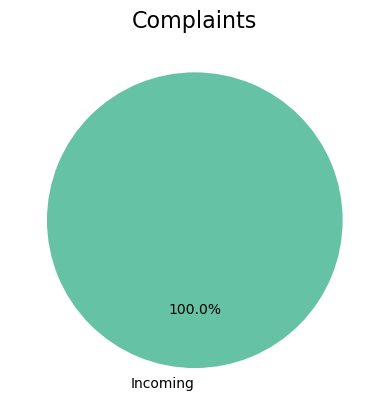

In [46]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

plt.pie(complaints.values(), labels = complaints.keys(),
        startangle=90, autopct='%.1f%%', colors=plt.cm.Set2.colors)
plt.title("Complaints" , fontsize=16)



Text(0.5, 1.0, 'Sales Support')

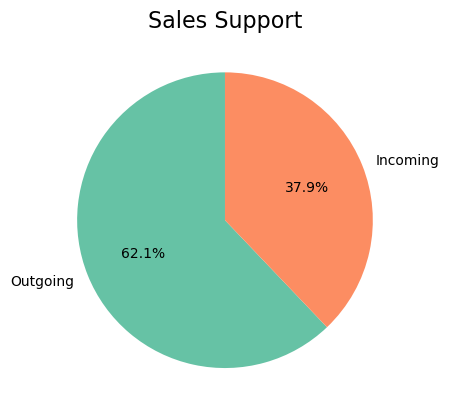

In [47]:
plt.pie(sales_support.values(), labels = sales_support.keys(),
        startangle=90, autopct='%.1f%%', colors=plt.cm.Set2.colors)
plt.title("Sales Support" , fontsize=16)

Text(0.5, 1.0, 'Product Support')

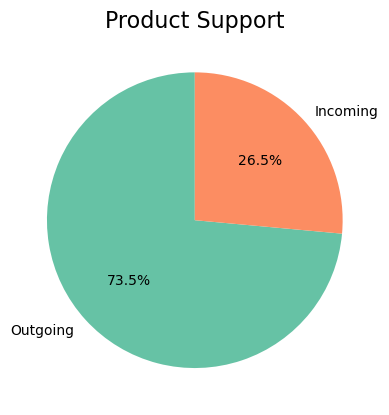

In [48]:
plt.pie(product_support.values(), labels = product_support.keys(),
        startangle=90, autopct='%.1f%%', colors=plt.cm.Set2.colors)
plt.title("Product Support" , fontsize=16)

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: The South Branch seems to be operating more efficiently as it has a lower call abandonment rate of 1.27% vs 2.87% in the north. 
The average speed of answer for the South branch (3.00) is lesser than the North (3.05). 
Even though, the Service level is (38.10%) for the South branch is slightly lesser than the north branch (40.24% ), these values may not be very accurate as there was a lot of missing date in the 'Incoming Wait Time Column.

The number of calls answered (both total incoming and incoming less than 2 seconds) is also much higher in the South branch(48, 126) compared to the North branch(33, 82).

I have chosen the KPI of 'average abandonment rate' and 'average speed of answer' to justify which branch is operating more efficiently.







#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The North branch will benefit from the extra help as it has 9 reps compared to the South branch which has 11 reps. The total count of calls is higher in the South Branch(314) compared to the North Branch(245).


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: If we had the full data in the 'Incoming Wait Time' column, we could get a more accurate analysis about the Service level in both branches.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: I have chosen the bar chart as it makes it easy to see the number of values for each time block.

Calls for each TimeBlock

9:00 AM  :  10,   10:00 AM :  99,  11:00 AM :  56,   
12:00 PM :  120,  1:00 PM  :  40,  2:00 PM  :  65,   
3:00 PM  :  73,   4:00 PM  :  53,  5:00 PM  :  43


<Axes: xlabel='Time Block', ylabel='Call Count'>

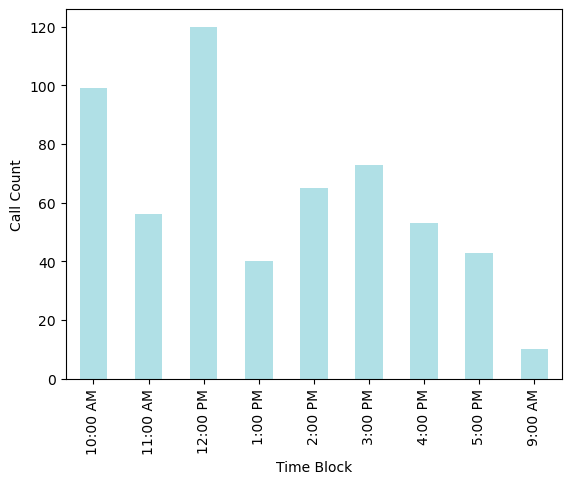

In [49]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

df.groupby('Time Block')['Calls'].sum().plot(kind='bar', color = ['#B0E0E6'], ylabel = 'Call Count')






In [50]:
df.groupby('Time Block')['Calls'].sum()

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

In [51]:
#Code to get the sum of calls based on grouping 'Call Purpose','Incoming or Outgoing', 'Time Block'
call_purpose_in_out_time_block = df.groupby(['Call Purpose','Incoming or Outgoing', 'Time Block']) \
.agg(calls_sum = ('Calls', 'sum'))


In [52]:
call_purpose_in_out_time_block

calls_sum
Call Purpose    Incoming or Outgoing Time Block           
Complaint       Incoming             10:00 AM            6
                                     11:00 AM            3
                                     12:00 PM           11
                                     1:00 PM             6
                                     2:00 PM             5
                                     3:00 PM             6
                                     4:00 PM             3
                                     5:00 PM             6
                                     9:00 AM             5
Product Support Incoming             10:00 AM            3
                                     11:00 AM            7
                                     12:00 PM            9
                                     1:00 PM             2
                                     2:00 PM            16
                                     3:00 PM            23
                                     4:00 PM            14
                                     5:00 PM             8
                Outgoing             10:00 AM           17
                                     11:00 AM           19
                                     12:00 PM           51
                                     1:00 PM            14
                                     2:00 PM            34
                                     3:00 PM            38
                                     4:00 PM            26
                                     5:00 PM            24
                                     9:00 AM             5
Sales Support   Incoming             10:00 AM           24
                                     11:00 AM            9
                                     12:00 PM           23
                                     1:00 PM             7
                                     2:00 PM             4
                                     3:00 PM             3
                                     4:00 PM             5
                Outgoing             10:00 AM           49
                                     11:00 AM           18
                                     12:00 PM           26
                                     1:00 PM            11
                                     2:00 PM             6
                                     3:00 PM             3
                                     4:00 PM             5
                                     5:00 PM             5

<Axes: xlabel='Calls', ylabel='Call Purpose,Incoming or Outgoing,Time Block'>

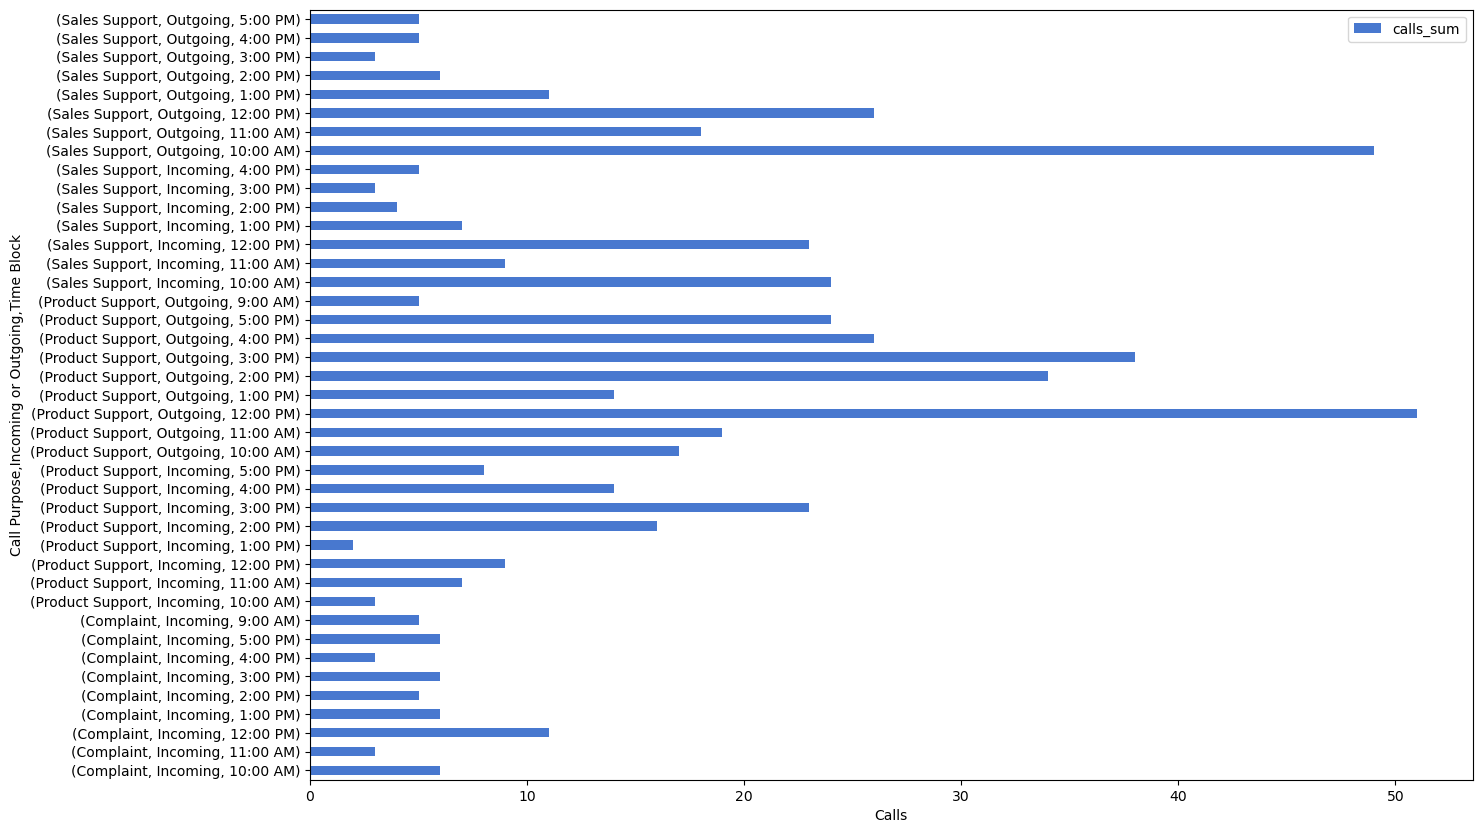

In [53]:
# Plotting based on abovve value
call_purpose_in_out_time_block.plot(kind='barh', figsize= (15,10), xlabel = 'Calls')

In [54]:

# Use groupby and get_group to select which call purpose to plot:

